# 神经网络的多分类问题（第一版还是用不了）  
重写一次

0.37645537828059467


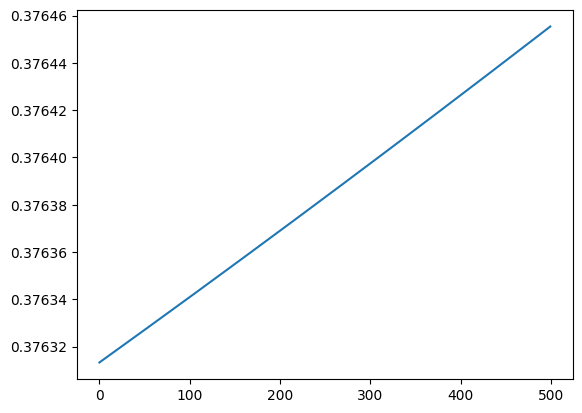

In [44]:
import numpy
from scipy.io import loadmat#读取mat文件
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1/(1+numpy.exp(-z))

def Dsigmoid(z):
    return sigmoid(z)*(1-sigmoid(z))

def getData():
    data=loadmat("ex4data1.mat")
    x=numpy.insert(data['X'],0,numpy.ones((5000)),axis=1)
    y=numpy.array(data['y'])
    ynum=numpy.array(data['y'])
    y=numpy.zeros((x.shape[0],10))
    for i in range(len(ynum)):
        y[i][ynum[i]-1]=1
    # theta1=(numpy.random.random((25,x.shape[1]))-0.5)*0.25
    # theta2=(numpy.random.random((10,26))-0.5)*0.25
    theta1=numpy.array(numpy.load('theta1.npy'))
    theta2=numpy.array(numpy.load('theta2.npy'))


    return x,y,theta1,theta2

def propagate_forward(x,theta1,theta2):
    z1=x@theta1.T
    h1=sigmoid(z1)
    h1=numpy.insert(h1,0,numpy.ones((5000)),axis=1)
    z2=h1@theta2.T
    h2=sigmoid(z2)
    return h2,h1

def cost(y,h2,theta1,theta2,L):
    m=y.shape[0]
    price=(-y*numpy.log(h2)-(1-y)*numpy.log(1-h2)).sum()/m
    regularization=(numpy.power(theta1,2).sum()+numpy.power(theta2,2).sum())*L/(2*m)
    return price+regularization

def back_propagation(theta1,theta2,x,errorValue,h1,dh1):
    decline2=numpy.zeros((10,26))
    decline1=numpy.zeros((25,401))

    for i in range(5000):
        decline2=decline2+errorValue[i].reshape(-1,1) @ h1[i].reshape(-1,1).T

        a=errorValue[i].reshape(-1,1).T@theta2
        b=dh1[i].reshape(-1,1)@x[i].reshape(-1,1).T

        decline1=decline1+a[:,1:].T*b

    return decline1,decline2

def neural_networks():
    x,y,theta1,theta2=getData()
    costs=[]
    for i in range(500):
        h2,h1=propagate_forward(x,theta1,theta2)
        j=cost(y,h2,theta1,theta2,1)
        errorValue=h2-y
        dh1=Dsigmoid(x@theta1.T)
        decline1,decline2=back_propagation(theta1,theta2,x,errorValue,h1,dh1)
        theta1=theta1-0.00001*decline1
        theta2=theta2-0.00001*decline2
        costs.append(j)
    plt.plot(costs)
    numpy.save('theta12.npy',theta1)
    numpy.save("theta22.npy",theta2)
    print(j)

neural_networks()

def test():
    x,y,theta1,theta2=getData()
    h2,h1=propagate_forward(x,theta1,theta2)
    h2[h2>0.5]=1
    h2[h2<=0.5]=0
    rigth=0
    for i in range(5000):
        if (h2[i,:]==y[i,:]).sum()==10:
            rigth+=1
    print(rigth,rigth/5000)
#test()
    